<h3>ФБ-21 Князян Кирило</h3>
<h1><center><b> Лабораторна робота №7 </b></center></h1>
<h2><center> Сценарії обробки багатоспектральних супутникових зображень </center></h2>

In [2]:
import os
import rasterio
import sklearn.metrics
import sentinelhub.aws 
from sentinelhub import SHConfig
from rasterio.plot import show
from landsatxplore.earthexplorer import EarthExplorer
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete");

Setup Complete


Завантаження даних Sentinel-2 та Landsat-8

In [3]:
folder = 'lab7_data'
if not os.path.exists(folder):
    os.makedirs(folder)

# config = SHConfig()
# config.aws_access_key_id = 'your_access_key_id'
# config.aws_secret_access_key = 'your_secret_access_key'
# config.save()

Sentinel2_id1 = "S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206"
Sentinel2_id2 = "S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206"
Landsat8_id1 = "LC08_L1TP_182025_20190830_20190903_01_T1"
Landsat8_id2 = "LC08_L1TP_182026_20190830_20190903_01_T1"

sentinelhub.aws.request.download_safe_format(Sentinel2_id1, folder=folder, data_collection='sentinel-s2-l2a')
sentinelhub.aws.request.download_safe_format(Sentinel2_id2, folder=folder, data_collection='sentinel-s2-l2a')

In [4]:
username = "your_username"
password = "your_password"

Landsat8_1path = os.path.join(folder, Landsat8_id1)
Landsat8_2path = os.path.join(folder, Landsat8_id2)

if os.path.exists(Landsat8_1path) and os.path.exists(Landsat8_2path):
    print("Landsat-8 data already downloaded")
else:
    ee = EarthExplorer(username, password)
    if not os.path.exists(Landsat8_1path):
        ee.download(identifier='LC08_L1TP_182025_20190830_20190903_01_T1', output_dir=folder)
    elif not os.path.exists(Landsat8_2path):
        ee.download(identifier='LC08_L1TP_182026_20190830_20190903_01_T1', output_dir=folder)
    ee.logout()

Landsat-8 data already downloaded


<h3><center> Sentinel 2 </center></h3>

Конкатенація каналів видимого, ближнього та середнього інфрачервоного спектральних діапазонів (канали 2, 3, 4 та 8) зображення в єдиний GEOTIFF файл.

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


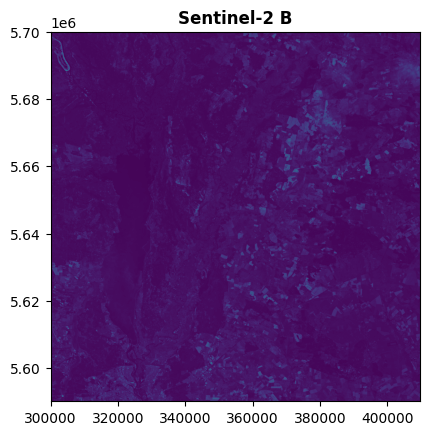

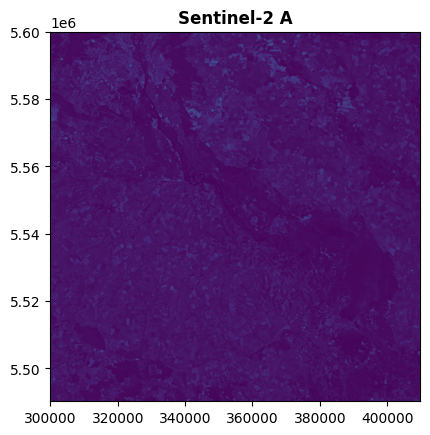

In [5]:
Sentinel2_1dir = os.path.join(folder, Sentinel2_id1+".SAFE")
Sentinel2_2dir = os.path.join(folder, Sentinel2_id2+".SAFE")
Sentinel2tifdir = os.path.join(folder, "sentinel2tif")
if not os.path.exists(Sentinel2tifdir):
    os.makedirs(Sentinel2tifdir)
Sentinel2_1tif_path = os.path.join(Sentinel2tifdir, "sentinel2_1.tif")
Sentinel2_2tif_path = os.path.join(Sentinel2tifdir, "sentinel2_2.tif")

Sentinel2_1_2 = os.path.join(Sentinel2_1dir, "GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B02_60m.jp2")
Sentinel2_1_3 = os.path.join(Sentinel2_1dir, "GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B03_60m.jp2")
Sentinel2_1_4 = os.path.join(Sentinel2_1dir, "GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B04_60m.jp2")
Sentinel2_1_8 = os.path.join(Sentinel2_1dir, "GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B8A_60m.jp2")
Sentinel2_2_2 = os.path.join(Sentinel2_2dir, "GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B02_60m.jp2")
Sentinel2_2_3 = os.path.join(Sentinel2_2dir, "GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B03_60m.jp2")
Sentinel2_2_4 = os.path.join(Sentinel2_2dir, "GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B04_60m.jp2")
Sentinel2_2_8 = os.path.join(Sentinel2_2dir, "GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B8A_60m.jp2")

os.system(f"gdal_merge.py -o {Sentinel2_1tif_path} -separate {Sentinel2_1_2} {Sentinel2_1_3} {Sentinel2_1_4} {Sentinel2_1_8}")
os.system(f"gdal_merge.py -o {Sentinel2_2tif_path} -separate {Sentinel2_2_2} {Sentinel2_2_3} {Sentinel2_2_4} {Sentinel2_2_8}")

with rasterio.open(Sentinel2_1tif_path) as s21:
    show(s21, title = "Sentinel-2 B")
with rasterio.open(Sentinel2_2tif_path) as s22:
    show(s22, title = "Sentinel-2 A")

Перепроектування супутникового зображення у проєкцію 4326.

Creating output file that is 2222P x 1404L.
Processing lab7_data/sentinel2tif/sentinel2_1.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 2209P x 1423L.
Processing lab7_data/sentinel2tif/sentinel2_2.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


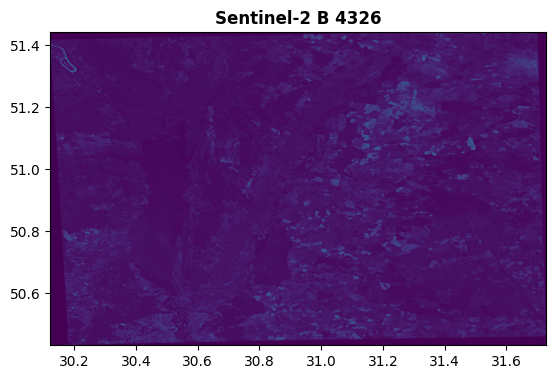

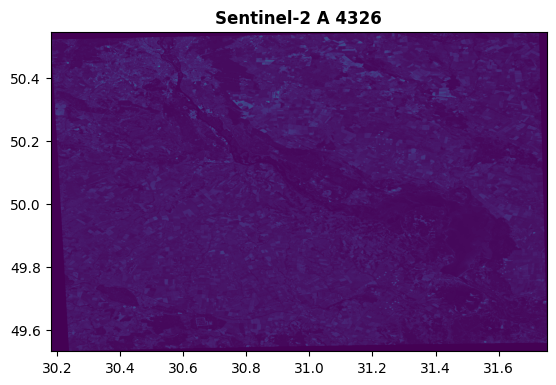

In [6]:
Sentinel2_14326_path = os.path.join(Sentinel2tifdir, "sentinel2_14326.tif")
Sentinel2_24326_path = os.path.join(Sentinel2tifdir, "sentinel2_24326.tif")

os.system(f"gdalwarp -t_srs EPSG:4326 {Sentinel2_1tif_path} {Sentinel2_14326_path}")
os.system(f"gdalwarp -t_srs EPSG:4326 {Sentinel2_2tif_path} {Sentinel2_24326_path}")

with rasterio.open(Sentinel2_14326_path) as s21:
    show(s21, title = "Sentinel-2 B 4326")
with rasterio.open(Sentinel2_24326_path) as s22:
    show(s22, title = "Sentinel-2 A 4326")

Конкатенація всіх отриманих растрів у один 4-канальний файл TIFF.

Creating output file that is 1830P x 3496L.
Processing lab7_data/sentinel2tif/sentinel2_1.tif [1/2] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing lab7_data/sentinel2tif/sentinel2_2.tif [2/2] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 2286P x 2684L.
Processing lab7_data/sentinel2tif/sentinel2_14326.tif [1/2] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing lab7_data/sentinel2tif/sentinel2_24326.tif [2/2] : 0...10...20...30...40...50...60...70...80...90...100 - done.


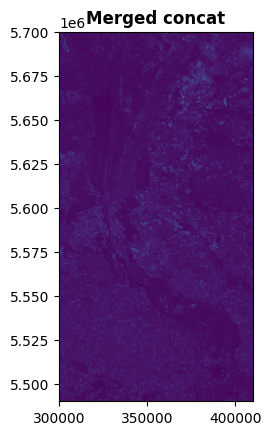

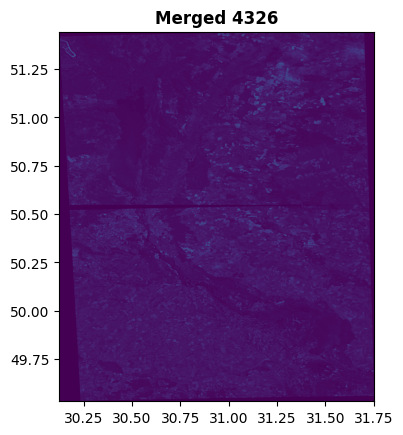

In [7]:
Sentinel2_tif_full_path = os.path.join(Sentinel2tifdir, "sentinel2_1full.tif")
Sentinel2_4326_full_path = os.path.join(Sentinel2tifdir, "sentinel2_2full.tif")

os.system(f"gdalwarp {Sentinel2_1tif_path} {Sentinel2_2tif_path} {Sentinel2_tif_full_path}")
os.system(f"gdalwarp {Sentinel2_14326_path} {Sentinel2_24326_path} {Sentinel2_4326_full_path}")

with rasterio.open(Sentinel2_tif_full_path) as s21:
    show(s21, title = "Merged concat")
with rasterio.open(Sentinel2_4326_full_path) as s22:
    show(s22, title = "Merged 4326")

Обрізання результуючого зображення по заданому векторному контуру.

Creating output file that is 677P x 707L.
Processing lab7_data/sentinel2tif/sentinel2_1full.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 805P x 527L.
Processing lab7_data/sentinel2tif/sentinel2_2full.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


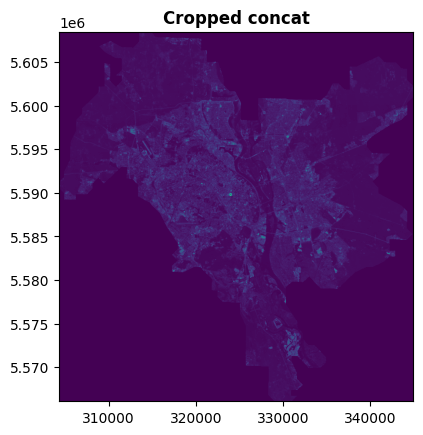

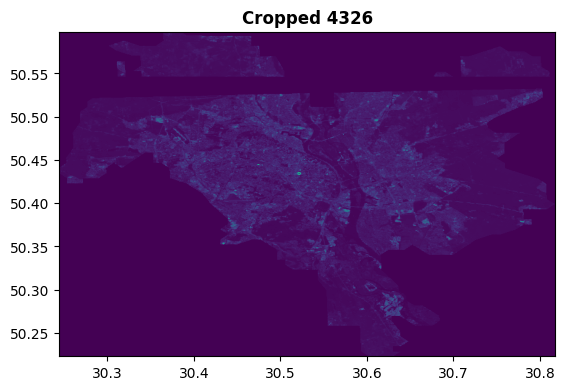

In [8]:
Sentinel2_tif_full_cut_path = os.path.join(Sentinel2tifdir, "sentinel2_1full_cut.tif")
Sentinel2_4326_full_cut_path = os.path.join(Sentinel2tifdir, "sentinel2_2full_cut.tif")

os.system(f"gdalwarp -cutline lab7_data/Kyiv_regions.shp -crop_to_cutline {Sentinel2_tif_full_path} {Sentinel2_tif_full_cut_path}")
os.system(f"gdalwarp -cutline lab7_data/Kyiv_regions.shp -crop_to_cutline {Sentinel2_4326_full_path} {Sentinel2_4326_full_cut_path}")

with rasterio.open(Sentinel2_tif_full_cut_path) as s21:
    show(s21, title = "Cropped concat")
with rasterio.open(Sentinel2_4326_full_cut_path) as s22:
    show(s22, title = "Cropped 4326")

<h3><center> Landsat 8 </center></h3>

Підготуйте склеєні RGB канали Landsat-8 та окремо панхроматичний канал.

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


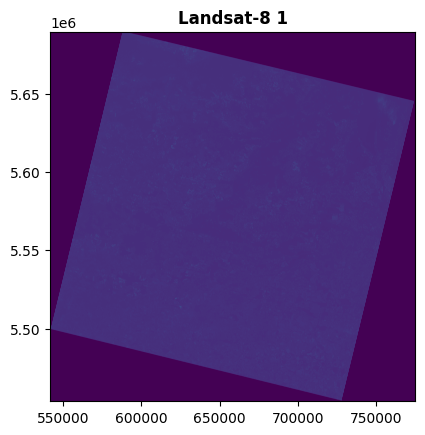

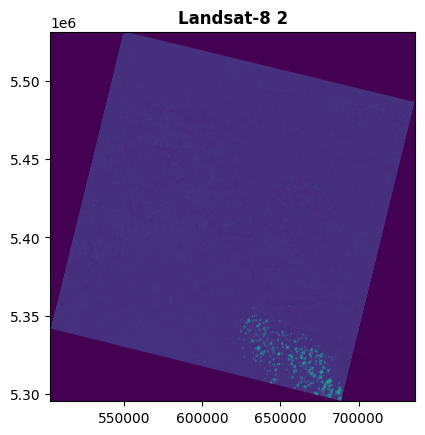

In [9]:
Landsat8tifdir = os.path.join(folder, "landsat8tif")
if not os.path.exists(Landsat8tifdir):
    os.makedirs(Landsat8tifdir)
Landsat8_1tif_path = os.path.join(Landsat8tifdir, "landsat8_1.tif")
Landsat8_2tif_path = os.path.join(Landsat8tifdir, "landsat8_2.tif")

Landsat8_1_2 = os.path.join(Landsat8_1path, "LC08_L1TP_182025_20190830_20190903_01_T1_B2.TIF")
Landsat8_1_3 = os.path.join(Landsat8_1path, "LC08_L1TP_182025_20190830_20190903_01_T1_B3.TIF")
Landsat8_1_4 = os.path.join(Landsat8_1path, "LC08_L1TP_182025_20190830_20190903_01_T1_B4.TIF")
Landsat8_1_8 = os.path.join(Landsat8_1path, "LC08_L1TP_182025_20190830_20190903_01_T1_B8.TIF")
Landsat8_2_2 = os.path.join(Landsat8_2path, "LC08_L1TP_182026_20190830_20190903_01_T1_B2.TIF")
Landsat8_2_3 = os.path.join(Landsat8_2path, "LC08_L1TP_182026_20190830_20190903_01_T1_B3.TIF")
Landsat8_2_4 = os.path.join(Landsat8_2path, "LC08_L1TP_182026_20190830_20190903_01_T1_B4.TIF")
Landsat8_2_8 = os.path.join(Landsat8_2path, "LC08_L1TP_182026_20190830_20190903_01_T1_B8.TIF")

os.system(f"gdal_merge.py -o {Landsat8_1tif_path} -separate {Landsat8_1_2} {Landsat8_1_3} {Landsat8_1_4}")
os.system(f"gdal_merge.py -o {Landsat8_2tif_path} -separate {Landsat8_2_2} {Landsat8_2_3} {Landsat8_2_4}")

with rasterio.open(Landsat8_1tif_path) as l81:
    show(l81, title = "Landsat-8 1")
with rasterio.open(Landsat8_2tif_path) as l82:
    show(l82, title = "Landsat-8 2")

Переведіть панхроматичний канал у 30 м, а RGB канали у 60 метрів.

Input file size is 7761, 7861
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 15521, 15721
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7771, 7871
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 15541, 15741
0...10...20...30...40...50...60...70...80...90...100 - done.


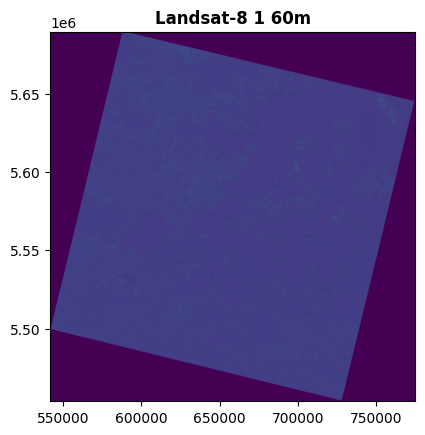

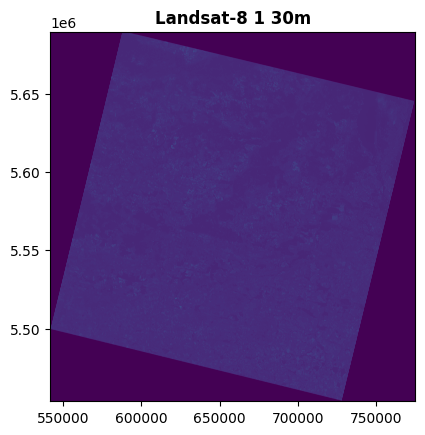

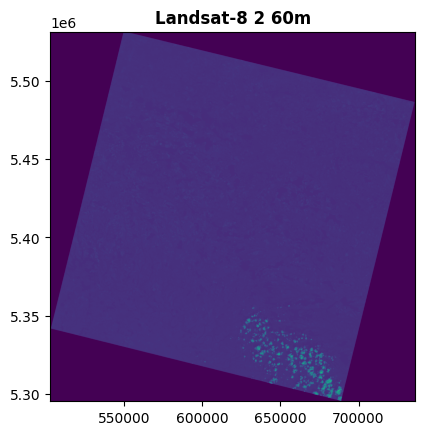

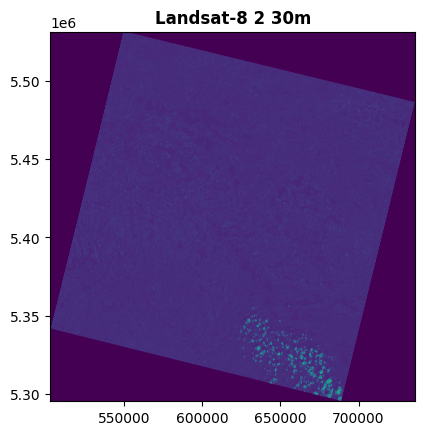

In [10]:
Landsat8_1translated_path = os.path.join(Landsat8tifdir, "landsat8_1translated.tif")
Landsat8_1_8translated_path = os.path.join(Landsat8tifdir, "landsat8_1_8translated.tif")
Landsat8_2translated_path = os.path.join(Landsat8tifdir, "landsat8_2translated.tif")
Landsat8_2_8translated_path = os.path.join(Landsat8tifdir, "landsat8_2_8translated.tif")
Landsat8_1_8_path = os.path.join(Landsat8_1path, "LC08_L1TP_182025_20190830_20190903_01_T1_B8.TIF")
Landsat8_2_8_path = os.path.join(Landsat8_2path, "LC08_L1TP_182026_20190830_20190903_01_T1_B8.TIF")

os.system(f"gdal_translate -tr 60 60 {Landsat8_1tif_path} {Landsat8_1translated_path}")
os.system(f"gdal_translate -tr 30 30 {Landsat8_1_8_path} {Landsat8_1_8translated_path}")
os.system(f"gdal_translate -tr 60 60 {Landsat8_2tif_path} {Landsat8_2translated_path}")
os.system(f"gdal_translate -tr 30 30 {Landsat8_2_8_path} {Landsat8_2_8translated_path}")

with rasterio.open(Landsat8_1translated_path) as l81:
    show(l81, title = "Landsat-8 1 60m")
with rasterio.open(Landsat8_1_8translated_path) as l82:
    show(l82, title = "Landsat-8 1 30m")
with rasterio.open(Landsat8_2translated_path) as l81:
    show(l81, title = "Landsat-8 2 60m")
with rasterio.open(Landsat8_2_8translated_path) as l82:
    show(l82, title = "Landsat-8 2 30m")

Після цього паншарпніть 60 метровий RGB за допомогою 30 м панхроматичного каналу.

In [11]:
methods = ["nearest", "average", "rms", "bilinear", "cubic", "cubicspline", "lanczos", "mode"]

for method in methods:
    Landsat8_1_pansharpen = os.path.join(Landsat8tifdir, f"landsat8_1_pansharpen_{method}.tif")
    os.system(f"gdal_pansharpen.py {Landsat8_1_8translated_path} {Landsat8_1translated_path} {Landsat8_1_pansharpen} -r {method}")

for method in methods:
    Landsat8_2_pansharpen = os.path.join(Landsat8tifdir, f"landsat8_2_pansharpen_{method}.tif")
    os.system(f"gdal_pansharpen.py {Landsat8_2_8translated_path} {Landsat8_2translated_path} {Landsat8_2_pansharpen} -r {method}")

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


Підрахуйте метрики точності паншарпенінгу. За даними метриками виберіть найкращий метод паншарпенінгу.

In [11]:
scores = {}
for method in methods:
    Landsat8_1_pansharpen = os.path.join(Landsat8tifdir, f"landsat8_1_pansharpen_{method}.tif")
    Landsat8_2_pansharpen = os.path.join(Landsat8tifdir, f"landsat8_2_pansharpen_{method}.tif")
    with rasterio.open(Landsat8_1tif_path) as src:
        landsat8_1_ref = src.read().flatten()
    with rasterio.open(Landsat8_1_pansharpen) as src:
        landsat8_1_pansharpen = src.read().flatten()
    with rasterio.open(Landsat8_2tif_path) as src:
        landsat8_2_ref = src.read().flatten()
    with rasterio.open(Landsat8_2_pansharpen) as src:
        landsat8_2_pansharpen = src.read().flatten()
    x = sklearn.metrics.r2_score(landsat8_1_ref, landsat8_1_pansharpen)
    y = sklearn.metrics.r2_score(landsat8_2_ref, landsat8_2_pansharpen)
    scores[method] = [x, y]

for method, score in scores.items():
    print(method, score)

max_score1_method = max(scores, key=lambda k: scores[k][0])
max_score2_method = max(scores, key=lambda k: scores[k][1])

print(f"Best method based on first image: {max_score1_method}, score = {scores[max_score1_method][0]}")
print(f"Best method based on second image: {max_score2_method}, score = {scores[max_score1_method][1]}")